In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
file_path = "employee_skills_dataset.xlsx"  # Replace with the correct file path
df = pd.read_excel(file_path)

In [6]:
projects = {
    "ML Project": ["Python", "Data Science", "TensorFlow"],
    "Web Development Project": ["JavaScript", "React.js", "Node.js", "Flutter"],
    "Cloud-Based Project": ["AWS", "Cloud Computing", "Docker", "Kubernetes"],
    "Cybersecurity Project": ["Cybersecurity", "Blockchain"],
    "Data Visualization Project": ["Excel", "Power BI"],
}


In [14]:
# Function to allocate employees to projects based on the dataset
def allocate_task(row):
    task_labels = []
    for project, required_skills in projects.items():
        if any(row.get(skill, 0) == 1 for skill in required_skills):
            task_labels.append(project)
    return ", ".join(task_labels) if task_labels else "No Task Assigned"

In [15]:
# Apply the function to create a new 'Task' column
df["Task"] = df.apply(allocate_task, axis=1)

In [16]:
df.head()

,emp_id,Python,AWS,Excel,Kotlin,Data Science,Cloud Computing,JavaScript,Java,SQL,React.js,Docker,TensorFlow,Power BI,Cybersecurity,Kubernetes,Blockchain,Flutter,Node.js,Task
0,E0001,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,1,"ML Project, Web Development Project, Cloud-Bas..."
1,E0002,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,"ML Project, Web Development Project, Cloud-Bas..."
2,E0003,1,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,0,1,"ML Project, Web Development Project, Cloud-Bas..."
3,E0004,0,0,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,1,"ML Project, Web Development Project, Cloud-Bas..."
4,E0005,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,0,0,1,"ML Project, Web Development Project, Cybersecu..."


In [17]:
# Prepare data for ML
X = df.drop(columns=["emp_id", "Task"])  # Features (skills)
y = df["Task"]  # Target (tasks)

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [20]:
# Train and evaluate each model
accuracy_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    
    # Print classification report for each model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Random Forest Classification Report:
                                                                                                             precision    recall  f1-score   support

                                     Cloud-Based Project, Cybersecurity Project, Data Visualization Project       0.00      0.00      0.00         1
                                                     ML Project, Cloud-Based Project, Cybersecurity Project       0.00      0.00      0.00         2
                         ML Project, Cloud-Based Project, Cybersecurity Project, Data Visualization Project       0.00      0.00      0.00         8
                                                ML Project, Cloud-Based Project, Data Visualization Project       0.00      0.00      0.00         1
                                                                        ML Project, Web Development Project       0.00      0.00      0.00         0
                                                   ML Project, Web 

C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Support Vector Machine Classification Report:
                                                                                                             precision    recall  f1-score   support

                                     Cloud-Based Project, Cybersecurity Project, Data Visualization Project       0.00      0.00      0.00         1
                                                     ML Project, Cloud-Based Project, Cybersecurity Project       0.00      0.00      0.00         2
                         ML Project, Cloud-Based Project, Cybersecurity Project, Data Visualization Project       1.00      0.25      0.40         8
                                                ML Project, Cloud-Based Project, Data Visualization Project       0.00      0.00      0.00         1
                                                   ML Project, Web Development Project, Cloud-Based Project       1.00      1.00      1.00        15
                            ML Project, Web Development Pr

C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Gradient Boosting Classification Report:
                                                                                                             precision    recall  f1-score   support

                                     Cloud-Based Project, Cybersecurity Project, Data Visualization Project       0.00      0.00      0.00         1
                                                     ML Project, Cloud-Based Project, Cybersecurity Project       1.00      1.00      1.00         2
                         ML Project, Cloud-Based Project, Cybersecurity Project, Data Visualization Project       1.00      1.00      1.00         8
                                                ML Project, Cloud-Based Project, Data Visualization Project       1.00      1.00      1.00         1
                                                   ML Project, Web Development Project, Cloud-Based Project       1.00      1.00      1.00        15
                            ML Project, Web Development Project

C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
# Compare accuracy
print("\nModel Accuracy Comparison:")
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy:.4f}")


Model Accuracy Comparison:
Random Forest: 0.8400
Logistic Regression: 0.9300
Support Vector Machine: 0.8450
K-Nearest Neighbors: 0.6300
Gradient Boosting: 0.9950


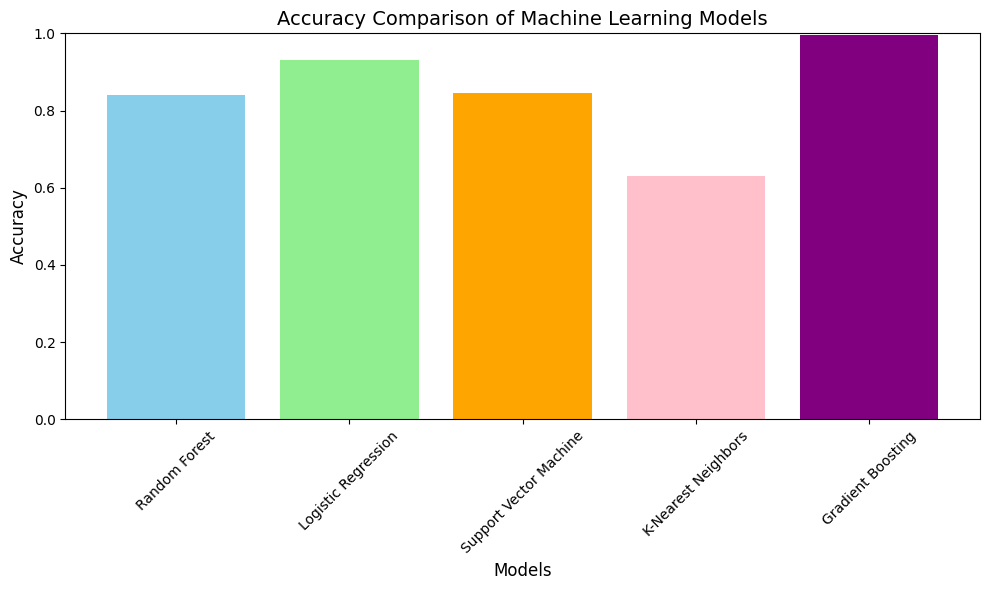

In [22]:
# Visualize the accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['skyblue', 'lightgreen', 'orange', 'pink', 'purple'])
plt.title("Accuracy Comparison of Machine Learning Models", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Accuracy range
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Save the model with the best accuracy for future use
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model = models[best_model_name]
print(f"\nThe best model is: {best_model_name} with accuracy {accuracy_results[best_model_name]:.4f}")


The best model is: Gradient Boosting with accuracy 0.9950


In [24]:
# Predict tasks for the full dataset using the best model
df["Predicted Task"] = best_model.predict(X)

In [25]:
df.head()

,emp_id,Python,AWS,Excel,Kotlin,Data Science,Cloud Computing,JavaScript,Java,SQL,...,Docker,TensorFlow,Power BI,Cybersecurity,Kubernetes,Blockchain,Flutter,Node.js,Task,Predicted Task
0,E0001,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,1,1,"ML Project, Web Development Project, Cloud-Bas...","ML Project, Web Development Project, Cloud-Bas..."
1,E0002,1,1,1,1,0,0,0,1,1,...,1,1,0,0,0,0,1,0,"ML Project, Web Development Project, Cloud-Bas...","ML Project, Web Development Project, Cloud-Bas..."
2,E0003,1,0,1,0,0,0,0,1,0,...,1,1,1,0,1,0,0,1,"ML Project, Web Development Project, Cloud-Bas...","ML Project, Web Development Project, Cloud-Bas..."
3,E0004,0,0,1,0,1,0,1,1,0,...,1,0,0,0,1,0,0,1,"ML Project, Web Development Project, Cloud-Bas...","ML Project, Web Development Project, Cloud-Bas..."
4,E0005,1,0,0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,1,"ML Project, Web Development Project, Cybersecu...","ML Project, Web Development Project, Cybersecu..."
